# Lecture One Principles of Data Science: 
* Histograms
* The Average
* The standard Deviation

*First lets load all of our Imports*

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from palmerpenguins import load_penguins

tab10 = plt.get_cmap("tab10").colors

%matplotlib inline

*The palmerPenguins package is just used as a dataset plugin.*
*The Data contains information about the Bill length and bill depth.*

**The Split-Apply-Combine paradigm in python**

Load data using load_penguins:

In [9]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**Above the Dataset is visible: It shows information about penguins (Species, Island, bill_length/depth, flipper_length, body_mass_g, sex and year of measurement)**

In [10]:
type(penguins)
#Check the type of the Data

pandas.core.frame.DataFrame

In [11]:
penguins.shape
#Check how many rows and columns are in the DataFrame

(344, 8)

In [12]:
penguins.dtypes
#Check what types of data we have in the DataFrame

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [13]:
#Select all the rows in the DataFrame which have missing values
ma = penguins.isna().sum(axis= 1) > 0 #define a mask for all missing values (returns a true false value)
penguins.loc[ma: ] #Go over the Data and check whether the conditions of the mask are fulfilled or not

InvalidIndexError: 0      False
1      False
2      False
3       True
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [14]:
penguins.body_mass_g #Calling a specific column of the dataset to be displayed
#Other notation penguins.loc["body_mass_g"]

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339    4000.0
340    3400.0
341    3775.0
342    4100.0
343    3775.0
Name: body_mass_g, Length: 344, dtype: float64

In [15]:
#Explore the Data
penguins.body_mass_g.describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

**Now onto the Histograms**

Text(0.5, 1.0, 'Body Mass of Penguins')

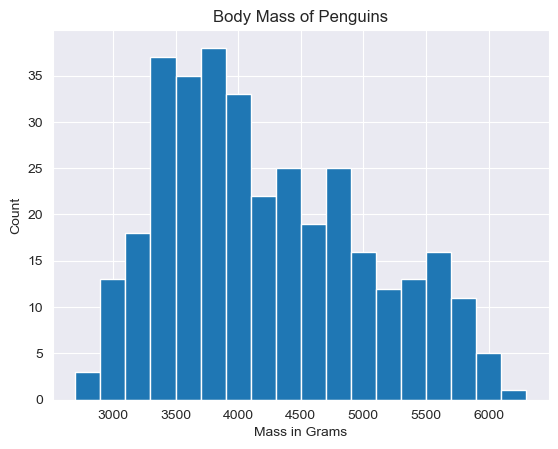

In [16]:
p = penguins.hist("body_mass_g", bins = 18) #bins = 18 is the number of bars the histogram will contain
plt.ylabel("Count") #Name of the Y-Axis
plt.xlabel("Mass in Grams") #Name of the X-Axis
plt.title("Body Mass of Penguins") #Title of the Plot

**The better way to do it**

Text(0, 0.5, 'Count')

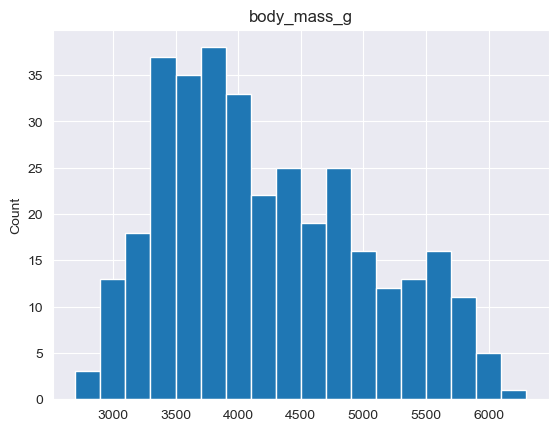

In [17]:
fig = plt.figure() #create a figure object to contain the Plot
ax = fig.add_subplot(111) #add a subplot to the figure

penguins.hist("body_mass_g", ax = ax, bins = 18) #plot the figure

ax.set_ylabel("Count") #add count as a Y-Axis Label

**Now onto Specifically using Matplotlib to plot**

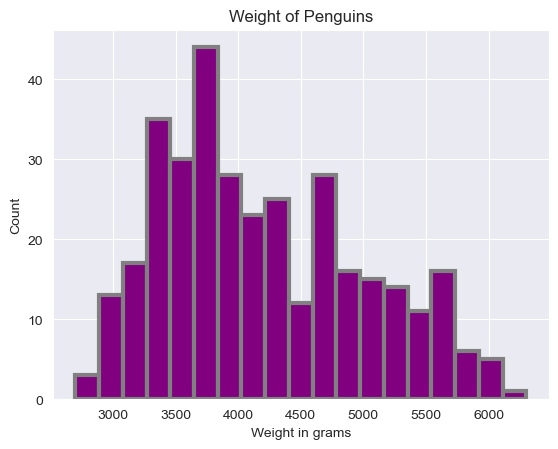

In [18]:
n, edges, bars = plt.hist(penguins.body_mass_g, bins = 19,lw = 3, edgecolor = "grey", facecolor = "purple")

plt.xlabel("Weight in grams")
plt.ylabel("Count")
plt.title("Weight of Penguins")
plt.grid(True)

In [19]:
cnts, edges = np.histogram(penguins.body_mass_g, bins = np.arange(2700, 6301, 200)) #We use the bins here by spacing the amount of datapoints we have by 200, thus giving us bars in the histograms spaced by exactly 200


In [20]:
centers = edges[0: -1] + np.diff(edges) / 2
centers

array([2800., 3000., 3200., 3400., 3600., 3800., 4000., 4200., 4400.,
       4600., 4800., 5000., 5200., 5400., 5600., 5800., 6000., 6200.])

Text(0.5, 1.0, 'Amount of Penguins per Mass')

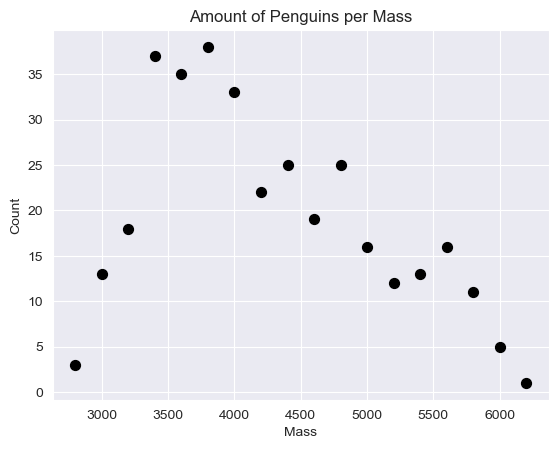

In [21]:
plt.scatter(centers, cnts, s=50, c="Black") 
plt.ylabel("Count")
plt.xlabel("Mass")
plt.title("Amount of Penguins per Mass")

Text(0.5, 0, 'Mass')

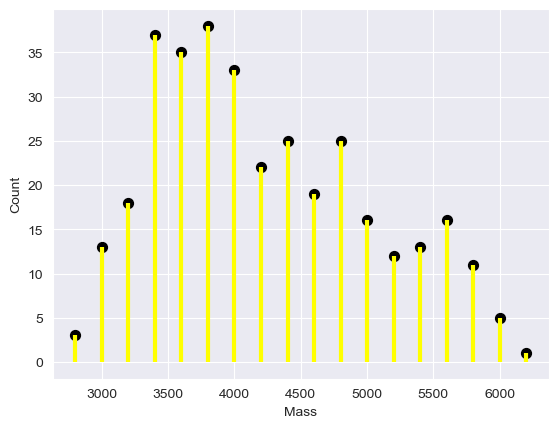

In [22]:
plt.scatter(centers, cnts, s=50, c="Black")
plt.vlines(centers, ymin = 0, ymax = cnts, colors="Yellow", lw = 3)

plt.ylabel("Count")
plt.xlabel("Mass")


Text(0.5, 0, 'Mass')

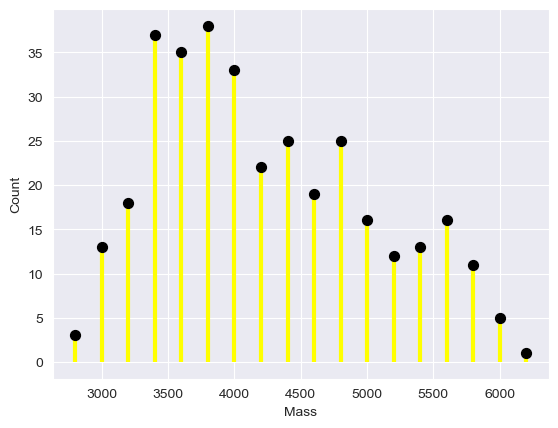

In [23]:
#In the previous plot we get overlapping (Lines over the Points)
#Thus we change the order things are places into this Graph
plt.scatter(centers, cnts, s=50, c="Black", zorder = 2)
plt.vlines(centers, ymin = 0, ymax = cnts, colors="Yellow", lw = 3, zorder = 1) #This is done by using the zorder command

plt.ylabel("Count")
plt.xlabel("Mass")


**Now we have beautiful plots!**

# The next step is Data Analysis
# Now lets look at some descriptive statistics

Text(0, 0.5, 'Number of Penguins')

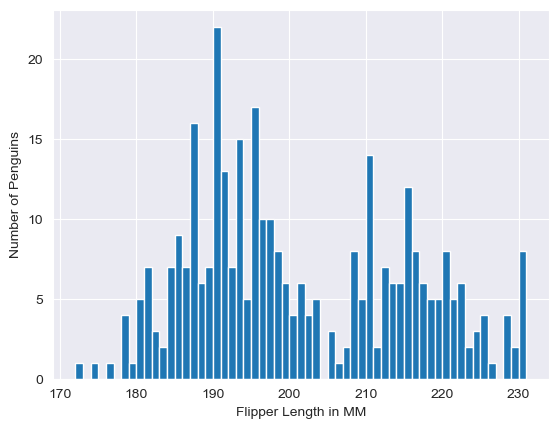

In [24]:
penguins.flipper_length_mm.hist(bins = np.arange(172, 232))
plt.xlabel("Flipper Length in MM")
plt.ylabel("Number of Penguins")

In [25]:
flipper = penguins.flipper_length_mm.dropna() #Drop Na values
flipper.sum() / flipper.size #Divide the sum by the mean

200.91520467836258

In [26]:
#Now lets do it with pandas
avg = penguins.flipper_length_mm.mean() #Na values are automatically dropped, easing the process

Text(0, 0.5, 'Number of Penguins')

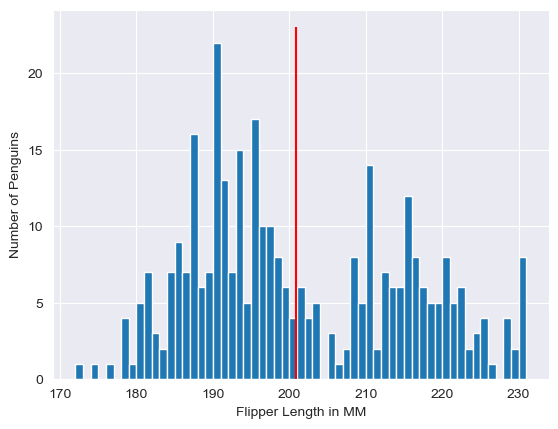

In [27]:
penguins.flipper_length_mm.hist(bins = np.arange(172, 232))
plt.vlines(avg, 0, 23, color = "Red")
plt.xlabel("Flipper Length in MM")
plt.ylabel("Number of Penguins")


In [28]:
[(a, b) for (a, b ) in enumerate(sorted(penguins.species.unique()))]

[(0, 'Adelie'), (1, 'Chinstrap'), (2, 'Gentoo')]

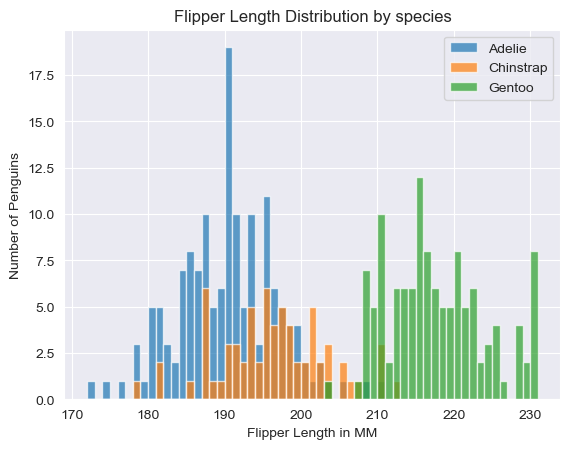

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
for num, s in enumerate(sorted(penguins.species.unique())):
    species_data = penguins[penguins.species == s]
    species_data.hist("flipper_length_mm", bins = np.arange(172, 232), ax = ax, color = "C{}".format(num),label = s, alpha = 0.7)
ax.set_xlabel("Flipper Length in MM")
ax.set_ylabel("Number of Penguins")
ax.set_title("Flipper Length Distribution by species")

ax.legend()

    

**The split apply combine Paradigm**

In [30]:
averages = penguins.groupby("species")["flipper_length_mm"].mean()
averages

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

**Standard Deviation**

In [31]:
adelie = penguins[penguins.species == "Adelie"].copy() #Copy to not change the data itself

In [32]:
spread = adelie.apply(lambda x: x.flipper_length_mm - adelie.flipper_length_mm.mean(), axis = 1)
spread

0      -8.953642
1      -3.953642
2       5.046358
3            NaN
4       3.046358
         ...    
147    -5.953642
148     5.046358
149     3.046358
150    -2.953642
151    11.046358
Length: 152, dtype: float64

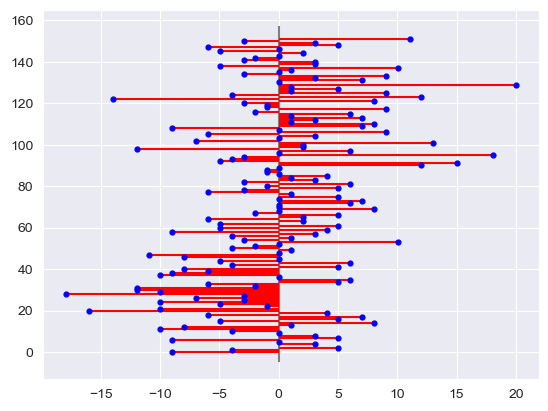

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hlines(spread.index, 0, spread, color = "Red", zorder = 2)
ax.scatter(spread, spread.index, s = 12, color = "Blue", zorder = 3)
ax.vlines(0, -5, adelie.shape[0] + 5, color = "Grey", zorder = 1)


In [34]:
mad = spread.abs().mean()
mad

5.046182184991887

In [35]:
spread.mean()

-1.3175626888266759e-15

In [36]:
spread.std() #STANDARD DEVIATION

6.539457417191297

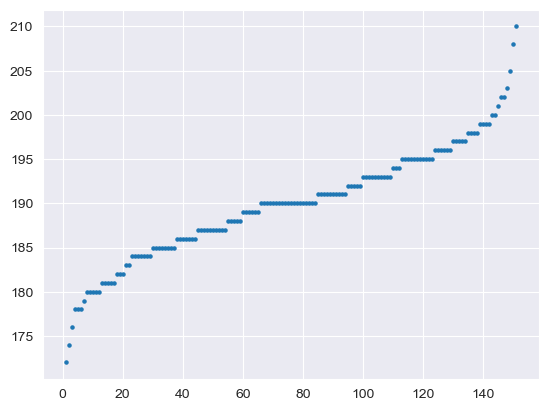

In [37]:
#Interquartile Ranges
plt.scatter(spread.rank(method = "first"), adelie.flipper_length_mm, s = 5)
#How the Observations Rank
# "In what percentile of my observations is my Data?"


<Axes: xlabel='species', ylabel='flipper_length_mm'>

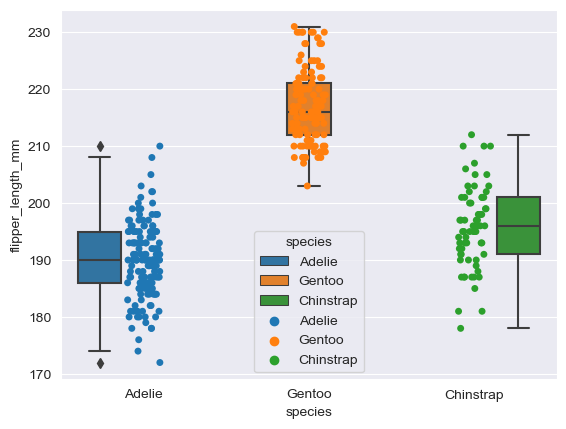

In [39]:
#Boxplot
sns.boxplot(data = penguins, x = "species", y = "flipper_length_mm", hue = "species")

sns.stripplot(data = penguins, x = "species", y = "flipper_length_mm", hue = "species")
